In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss, coint

In [2]:
today = datetime.datetime.now()
last = datetime.datetime(today.year - 1, today.month, today.day)

year = last.strftime('%Y-%m-%d')
on_year = today.strftime('%Y-%m-%d')

gold = yf.download('GC=F', start=year, end=on_year)
paxg = yf.download('PAXG-USD', start=year, end=on_year)
pyusd = yf.download('PYUSD-USD', start=year, end=on_year)
usdp = yf.download('USDP-USD', start=year, end=on_year)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


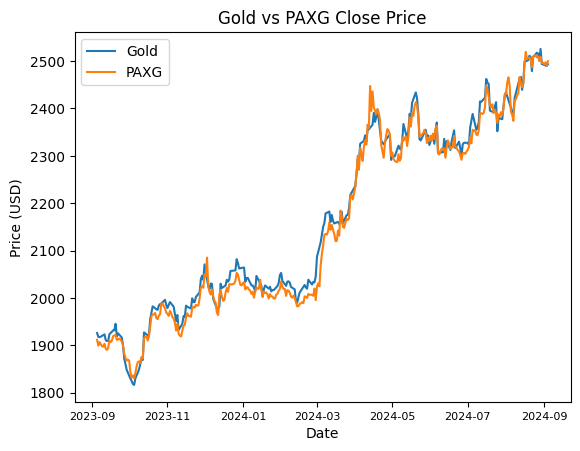

In [3]:
plt.plot(gold.index, gold['Close'], label='Gold')
plt.plot(paxg.index, paxg['Close'], label='PAXG')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Gold vs PAXG Close Price')

plt.legend()

plt.xticks(fontsize=8)

plt.show()

In [4]:
aligned_data = pd.concat([gold['Close'], paxg['Close']], axis=1, keys=['Gold', 'PAXG']).dropna()
t_statistic, p_value = stats.ttest_rel(aligned_data['Gold'], aligned_data['PAXG'])

print(f"Paired t-test results:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

mean_difference = (aligned_data['Gold'] - aligned_data['PAXG']).mean()
print(f"Mean difference (Gold - PAXG): ${mean_difference:.4f}")

correlation = aligned_data['Gold'].corr(aligned_data['PAXG'])
print(f"Correlation between Gold and PAXG: {correlation:.4f}")

cointegration = coint(aligned_data['Gold'], aligned_data['PAXG'])
print(f"Cointegration between Gold and PAXG: {cointegration[0]}")
print(f"p-value: {cointegration[1]}")

Paired t-test results:
t-statistic: 11.79830359768649
p-value: 7.183966329074175e-26
Mean difference (Gold - PAXG): $10.6157
Correlation between Gold and PAXG: 0.9976
Cointegration test statistic: -4.779872664038399
p-value: 0.00040946156483279096


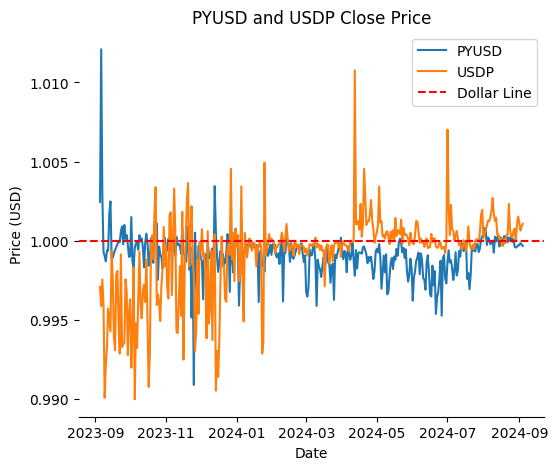

In [14]:
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(pyusd.index, pyusd['Close'], label='PYUSD')
ax.plot(usdp.index, usdp['Close'], label='USDP')
ax.axhline(y=1, color='r', linestyle='--', label='Dollar Line')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.set_title('PYUSD and USDP Close Price')
ax.legend()
plt.show()

In [6]:
def run_stationarity_tests(series, name):
    print(f"Stationarity Tests for {name}")
    
    result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    
    print("\n")

run_stationarity_tests(pyusd['Close'], "PYUSD")

run_stationarity_tests(usdp['Close'], "USDP")

for coin in [pyusd, usdp]:
    name = "PYUSD" if coin is pyusd else "USDP"
    print(f"{name} Statistics:")
    print(f"Mean: {coin['Close'].mean():.6f}")
    print(f"Std Dev: {coin['Close'].std():.6f}")
    print(f"Min: {coin['Close'].min():.6f}")
    print(f"Max: {coin['Close'].max():.6f}")
    print("\n")

Stationarity Tests for PYUSD
ADF Test:
ADF Statistic: -3.5678509613313403
p-value: 0.00640624274105982
Critical Values:
	1%: -3.4490648539347544
	5%: -2.8697861692116478
	10%: -2.5711631253228306

KPSS Test:
KPSS Statistic: 0.7117004171020193
p-value: 0.012481780263452794
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


Stationarity Tests for USDP
ADF Test:
ADF Statistic: -2.252499633725988
p-value: 0.18774546499415717
Critical Values:
	1%: -3.44911857009962
	5%: -2.8698097654570507
	10%: -2.5711757061225153

KPSS Test:
KPSS Statistic: 2.320293808842307
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


PYUSD Statistics:
Mean: 0.999129
Std Dev: 0.001391
Min: 0.990897
Max: 1.012099


USDP Statistics:
Mean: 0.999183
Std Dev: 0.002584
Min: 0.989995
Max: 1.010761




/var/folders/fy/tvcylj6s5vb1kwcy88vnrjh40000gn/T/ipykernel_45415/3818494860.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series)
